## Author: Miral Patel

## TASK 5 - SALES PREDICTION USING PYTHON

# Problem statement:
Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So, let's start the task of sales prediction with machine learning using python.

## Importing the necessary Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [65]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [60]:
print("Top 5 rows:\n")
df.head()  

Top 5 rows:



,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [61]:
print("Last 5 rows:\n")
df.tail()

Last 5 rows:



,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


#### Chcking for the null values if present

In [62]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [99]:
df = pd.read_csv('Advertising.csv', index_col=0)

In [100]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


we dont required the first column so we removed it

In [101]:
print("The Information about the data:\n")
df.info()

The Information about the data:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [102]:
print("The staistics of the data:\n")
df.describe()

The staistics of the data:



,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [103]:
print("The number of rows and columns:",df.shape)
print("The size of the dataset",df.size)

The number of rows and columns: (200, 4)
The size of the dataset 800


In [104]:
print("The coloumns in the data set:\n")
df.columns

The coloumns in the data set:



Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

## Visualization Of The Data

### 1. By Using Scatterplots

Text(0.5, 1.0, 'Sales of TV')

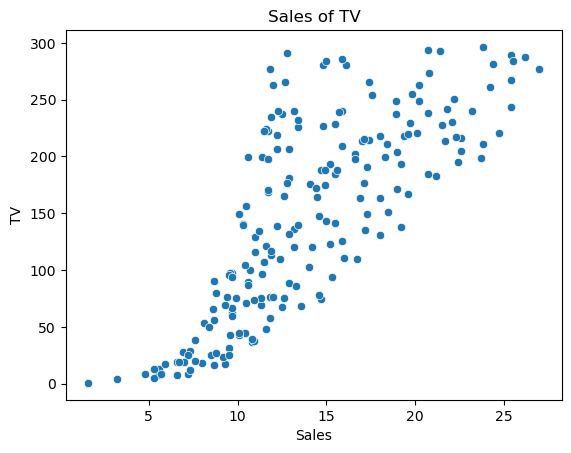

In [106]:
sns.scatterplot(df,x='Sales',y='TV')
plt.title('Sales of TV')

Text(0.5, 1.0, 'Sales of Radio')

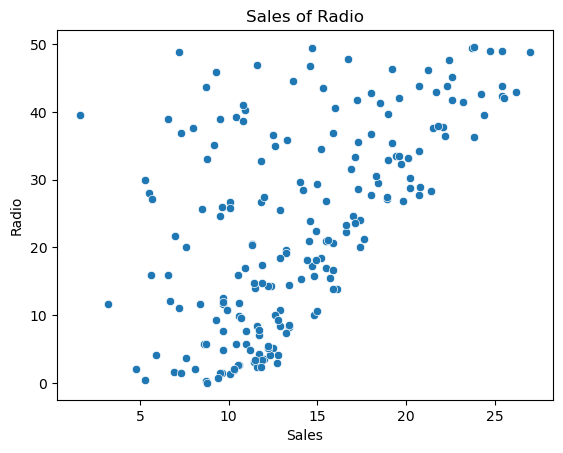

In [107]:
sns.scatterplot(df,x='Sales',y='Radio')
plt.title('Sales of Radio')

Text(0.5, 1.0, 'Sales of Newspaper')

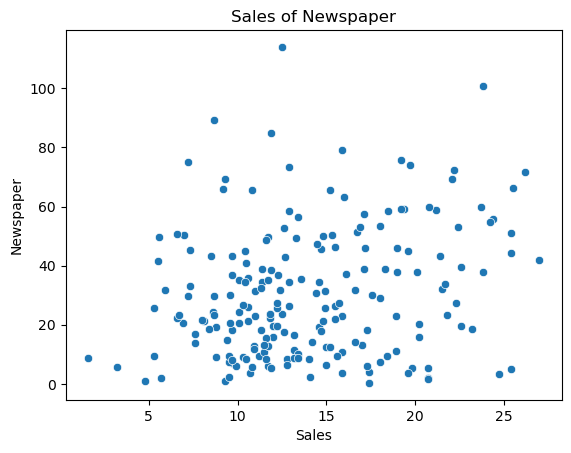

In [108]:
sns.scatterplot(df,x='Sales',y='Newspaper')
plt.title('Sales of Newspaper')

### 2. By Using Lineplots

Text(0.5, 1.0, 'Sales of TV')

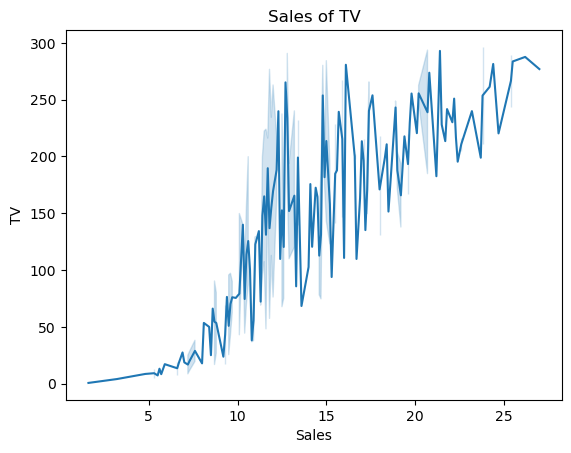

In [109]:
sns.lineplot(df,x='Sales',y='TV')
plt.title('Sales of TV')

Text(0.5, 1.0, 'Sales of radio')

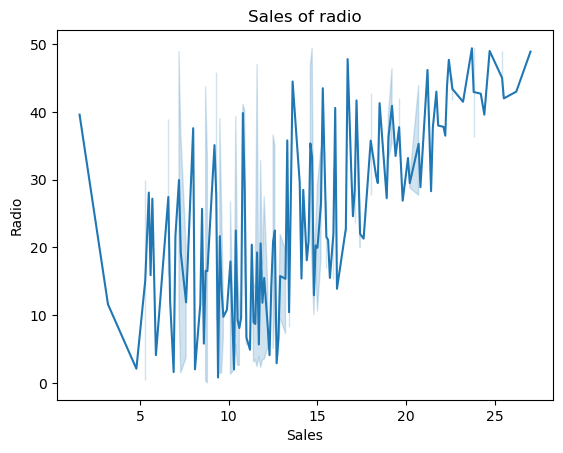

In [110]:
sns.lineplot(df,x='Sales',y='Radio')
plt.title('Sales of radio')

Text(0.5, 1.0, 'Sales of Newspaper')

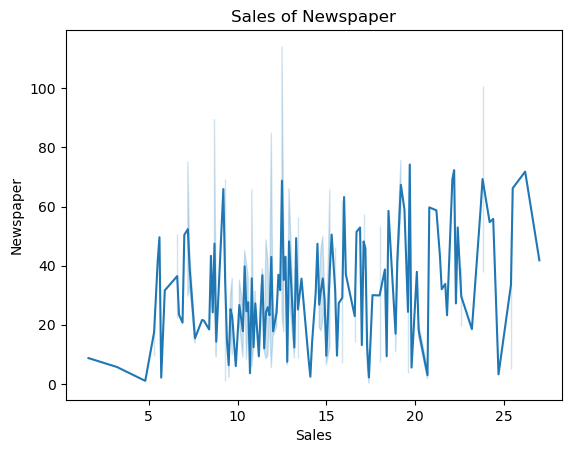

In [111]:
sns.lineplot(df,x='Sales',y='Newspaper')
plt.title('Sales of Newspaper')

### 3. By Using Pairplots

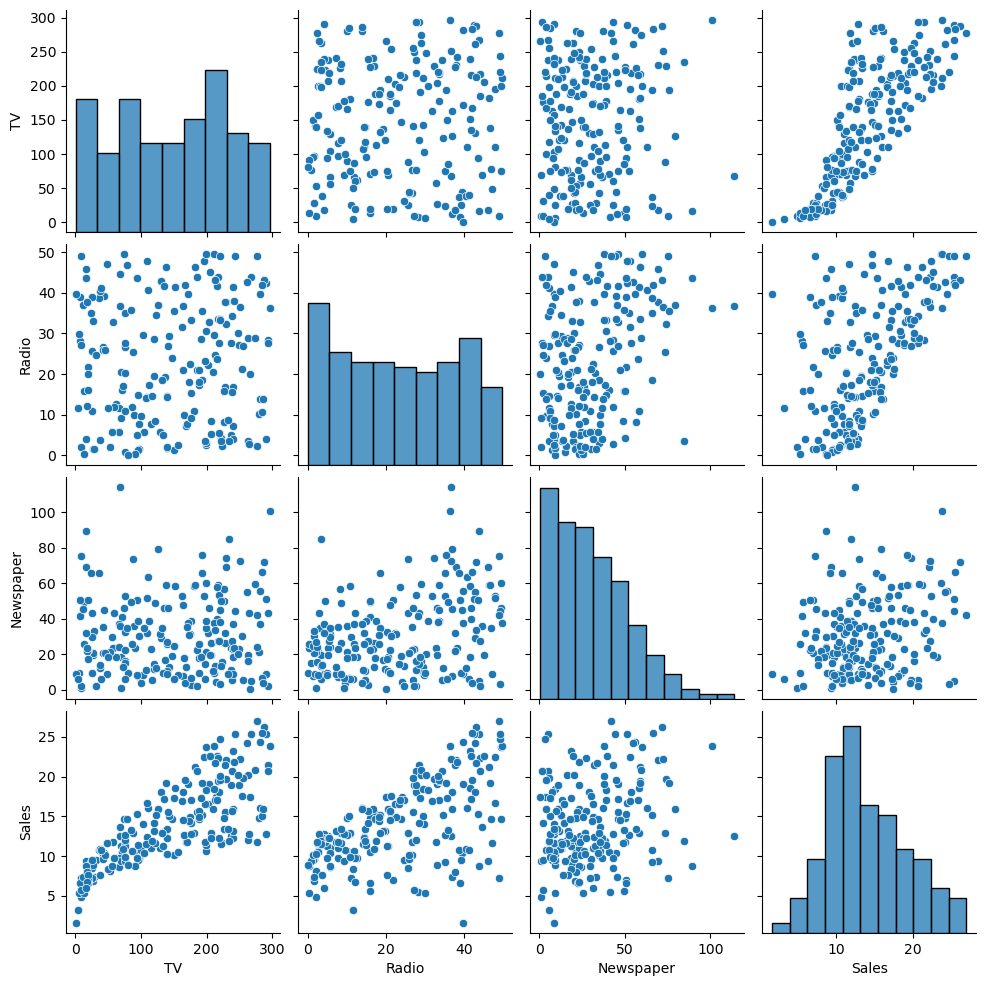

In [112]:
sns.pairplot(df)

## Using Correlation Matrix

In [113]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

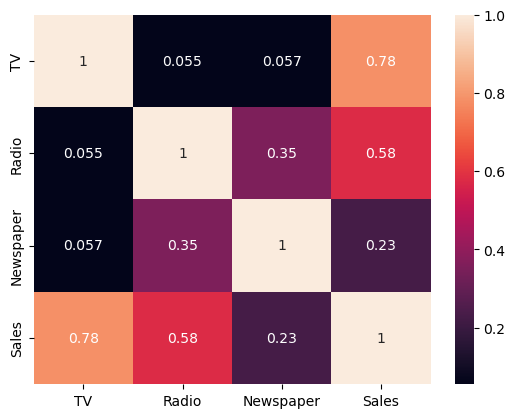

In [114]:
cor = df.corr()
sns.heatmap(cor,annot=True)

In [116]:
features = df[['TV', 'Radio', 'Newspaper']]
target = df['Sales']

In [117]:
display(features)

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [118]:
display(target)

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: Sales, Length: 200, dtype: float64

## Using Train Test Split

In [119]:
X_train,X_test,Y_train,Y_test = train_test_split(features,target,test_size = 0.2,random_state=3)

### Training The Data

In [120]:
print("Training Data:\n")
display(X_train)
display(Y_train)

Training Data:



,TV,Radio,Newspaper
157,93.9,43.5,50.5
116,75.1,35.0,52.7
156,4.1,11.6,5.7
16,195.4,47.7,52.9
62,261.3,42.7,54.7
...,...,...,...
1,230.1,37.8,69.2
185,253.8,21.3,30.0
132,265.2,2.9,43.0
153,197.6,23.3,14.2


157    15.3
116    12.6
156     3.2
16     22.4
62     24.2
       ... 
1      22.1
185    17.6
132    12.7
153    16.6
107     7.2
Name: Sales, Length: 160, dtype: float64

### Testing The Data

In [121]:
print("Testing Data:\n")
display(X_test)
display(Y_test)

Testing Data:



,TV,Radio,Newspaper
41,202.5,22.3,31.6
52,100.4,9.6,3.6
140,184.9,43.9,1.7
198,177.0,9.3,6.4
171,50.0,11.6,18.4
83,75.3,20.3,32.5
184,287.6,43.0,71.8
47,89.7,9.9,35.7
71,199.1,30.6,38.7
101,222.4,4.3,49.8


41     16.6
52     10.7
140    20.7
198    12.8
171     8.4
83     11.3
184    26.2
47     10.6
71     18.3
101    11.7
180    12.6
84     13.6
26     12.0
191    10.8
160    12.9
174    11.7
96     16.9
4      18.5
42     17.1
59     23.8
15     19.0
144    10.4
13      9.2
7      11.8
183     8.7
162    13.3
129    24.7
123    11.6
102    23.8
87     12.0
65     18.0
48     23.2
159     7.3
35      9.5
39     10.1
197     9.7
5      12.9
73      8.8
68     13.4
146    10.3
Name: Sales, dtype: float64

## By Using Linear Regression Model

In [122]:
model = LinearRegression()

### Training The Model

In [123]:
model.fit(X_train,Y_train)

LinearRegression()

In [124]:
from sklearn.metrics import accuracy_score

In [125]:
prediction_on_training = model.predict(X_train)

In [126]:
prediction_on_training 

array([15.29960534, 12.87274007,  5.25192245, 20.70121418, 22.7781242 ,
       24.62068355, 14.36096179, 10.28419256, 16.46529542, 18.10474697,
       11.31865649, 14.67150401, 16.8206314 ,  8.33131703, 19.5255608 ,
       10.52809313, 23.12069472, 21.53727358, 15.96309937, 14.87011108,
       13.69030388,  9.89518531, 10.59535976,  8.70331574, 21.40843871,
       19.17401395,  4.49097362,  8.76564903, 15.2043697 , 17.19666136,
       12.44956074, 15.17652565, 17.56366164, 13.89162178,  7.84454092,
       17.15594287, 14.32644533,  8.10194923, 10.07735652, 19.0950662 ,
        3.692491  , 19.84770787, 16.96155874, 17.84993842, 15.56002029,
       17.17643571, 13.91765668, 12.68633552, 14.31865233,  6.51489914,
       10.53212153, 16.94648334, 14.15231123, 15.54286063, 11.81543697,
       13.07656796,  9.41539516, 18.28477144, 13.82105912, 15.08619185,
       16.91550905,  7.77522601, 12.62307249,  9.09663732, 23.99290717,
       12.91006284, 14.06478928,  3.61215223,  8.86335923, 18.82

So above we made the prediction on the training data.

In [127]:
print("The score of the model is:",r2_score(Y_train,prediction_on_training))

The score of the model is: 0.8930288385772915


In [128]:
prediction_on_testing_data = model.predict(X_test)
prediction_on_testing_data

array([16.29678619,  9.26361596, 19.45830733, 12.69896986,  7.35693629,
       10.13630662, 24.05157829,  8.87047296, 17.68702804, 13.89240253,
       12.32295085, 14.30587321, 15.55191065, 12.32493385, 12.35493367,
       11.90781853, 16.25923093, 17.52440317, 17.19918066, 21.73587709,
       18.3492105 ,  8.76977821, 10.57143038, 11.62914846,  6.56053195,
       13.49937253, 22.01597073, 13.57251413, 23.24678946, 11.49494839,
       16.83780927, 21.53825408, 10.32893524,  7.5361673 ,  9.85817806,
        8.11664682, 13.21200505, 10.26339272, 11.94972059,  9.66124841])

So above we made the prediction on the testing data.

In [129]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,prediction_on_testing_data)

2.1537819056615666

Above we used the mean squared error method

### Calculating The Coefficient

In [130]:
coefficient = model.coef_
coefficient

array([0.04552917, 0.18512403, 0.00119881])

### Calculating The Intercept

In [131]:
intercept = model.intercept_
intercept

2.910980862854185

In [132]:
forecast=pd.DataFrame(data={'Forecasted Sales':prediction_on_testing_data.flatten()})
forecast

,Forecasted Sales
0,16.296786
1,9.263616
2,19.458307
3,12.698970
4,7.356936
5,10.136307
6,24.051578
7,8.870473
8,17.687028
9,13.892403


## So From Above Data We Can See The Prediction Of The Sales.